In [7]:
!unzip dataset.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import  img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [9]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [10]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [11]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [12]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

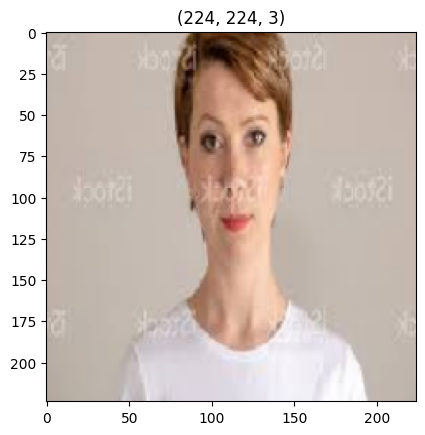

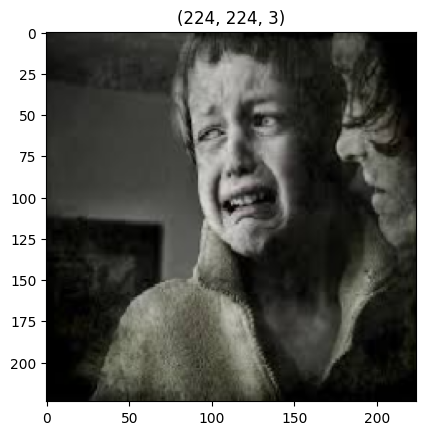

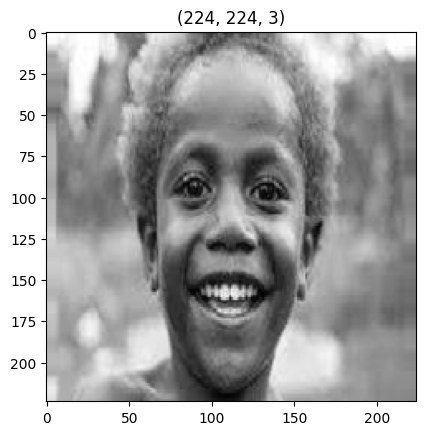

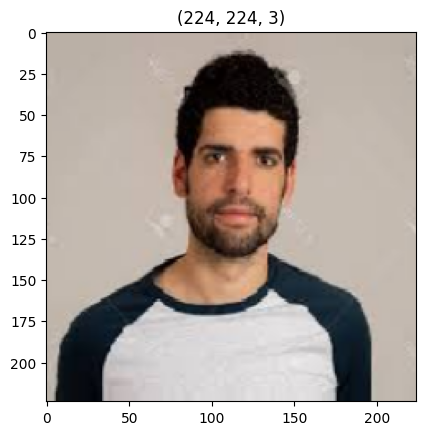

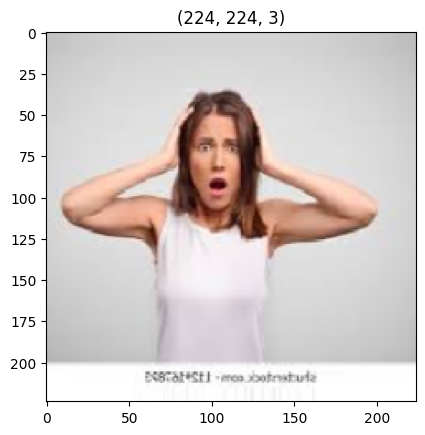

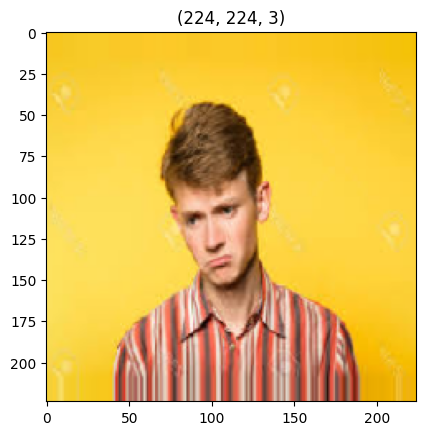

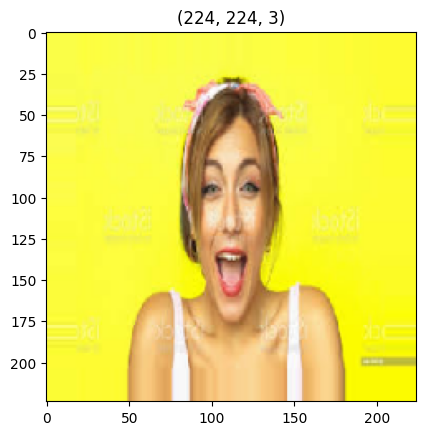

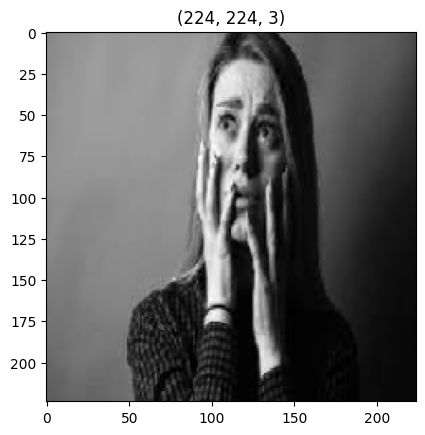

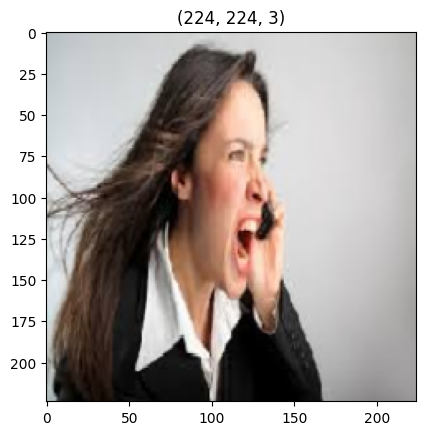

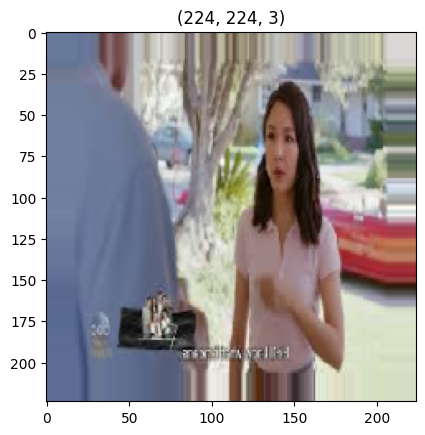

In [13]:
# to visualize the images in the traing data denerator 
t_img, label = next(train_data)
# train_data.filenames


#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [14]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.keras", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [15]:
hist = model.fit(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

Epoch 1/30


c:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 911ms/step - accuracy: 0.1821 - loss: 8.0158
Epoch 1: val_accuracy improved from -inf to 0.55469, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.1857 - loss: 8.0465 - val_accuracy: 0.5547 - val_loss: 3.5313
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 7s 794ms/step - accuracy: 0.2667 - loss: 7.5809

c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_accuracy improved from 0.55469 to 0.56383, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 345ms/step - accuracy: 0.2667 - loss: 7.5809 - val_accuracy: 0.5638 - val_loss: 2.4851
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - accuracy: 0.5995 - loss: 2.9258
Epoch 3: val_accuracy improved from 0.56383 to 0.77734, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6047 - loss: 2.8714 - val_accuracy: 0.7773 - val_loss: 1.1986
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 8s 900ms/step - accuracy: 0.7500 - loss: 1.5763
Epoch 4: val_accuracy did not improve from 0.77734
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.7500 - loss: 1.5763 - val_accuracy: 0.6383 - val_loss: 1.9495
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 922ms/step - accuracy: 0.7688 - loss: 1.1810
Epoch 5: val_accuracy improved from 0.77734 to 0.87500, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7701 - loss: 1.1797 -

In [16]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.keras")

In [17]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

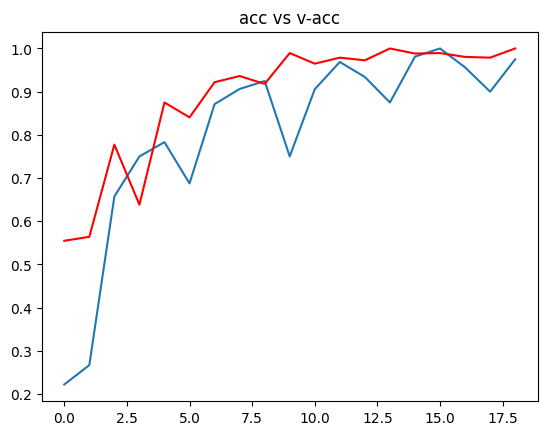

In [18]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

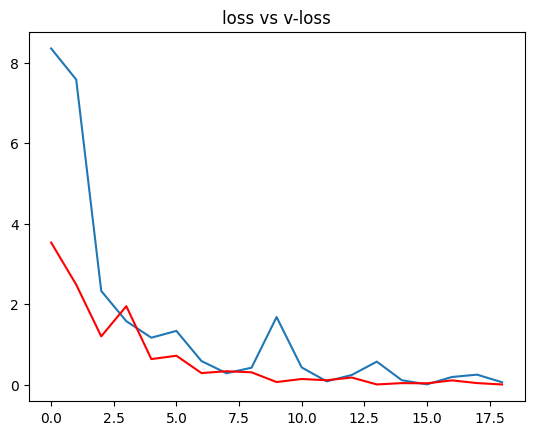

In [19]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [20]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
 the image is of Angry


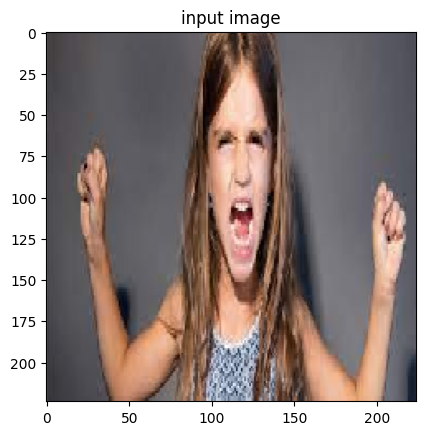

In [21]:
# path for the image to see if it predics correct class

path = "train/Angry/download (1).jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()